## http://hgdownload.cse.ucsc.edu/goldenPath/hg38/vsPanTro5/
## hg38.panTro5.net.axt.gz    04-Aug-2016 01:50  1.5G 

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Version 3 Visualization

## Two-mer matrix: AA -> AC = ln (observed/expected) ;  
## observed = # AA->AC, expected = #AA x pr(A->A) x pr(A->C)

            AA        AC        AG        AT        CA        CC        CG  \
kmer                                                                         
AA    0.005385 -0.068529 -0.350868 -0.105396  0.047029  1.918901  0.232927   
AC    0.217308 -0.008033  0.242768  0.343913  2.117146  0.222524  1.041718   
AG   -0.387045 -0.057496  0.005200 -0.257118  1.698165  1.264586 -0.477082   
AT    0.094446  0.273513 -0.019723 -0.005496  1.682517  0.827489  0.508279   
CA   -0.023519  1.776766  1.629135  1.563654  0.001007  0.042137  0.255164   
CC    1.692346 -0.197301  1.186371  0.531992  0.033593  0.006873 -0.497895   
CG    1.811553  2.209376  1.074036  1.930891  1.895608  1.131056 -0.171510   
CT    1.362568  0.768672  1.221119 -0.255613 -0.064286  0.001722 -0.476193   
GA   -0.311418  0.640285  0.530986  0.968176  0.047189  1.007655  0.466212   
GC    0.801362 -0.100130  0.816865  0.656484  1.319952 -0.051762  1.205338   
GG    0.036507  0.405135 -0.074910  0.496612  1.464246  0.965591

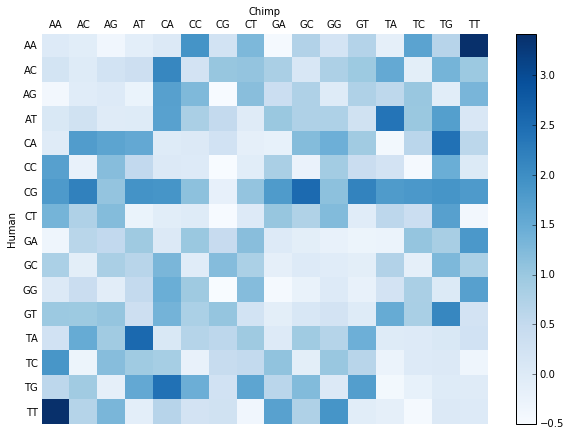

In [70]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from itertools import product

import datetime as dt
n1=dt.datetime.now()

bases=['A','C','G','T']
k = 2
kmer_list = [''.join(p) for p in product(bases, repeat=k)]
        
count_table = pd.read_csv("/home/alisay/hexamer_mutation_data/hg38.panTro5.two_mers_transitions",index_col=0, header=0)
#print(count_table)
two_mer_frequency_table = pd.read_csv("/home/alisay/hexamer_mutation_data/hg38.panTro5.two_mers_frequency",index_col=0, header=0)
#print(two_mer_frequency_table)

one_mer_count_table = pd.read_csv("/home/alisay/hexamer_mutation_data/hg38.panTro5.one_mers_transitions",index_col=0, header=0)
#print(one_mer_count_table)
one_mer_frequency_table = pd.read_csv("/home/alisay/hexamer_mutation_data/hg38.panTro5.one_mers_frequency",index_col=0, header=0)
#print(one_mer_frequency_table)

# fill the diagonal with very high values
#np.fill_diagonal(count_table.values, 10000000)

# perform the computation

for row_header in kmer_list:
    for col_header in kmer_list:
        prob_first_onemer = one_mer_count_table.loc[row_header[0]][col_header[0]]/one_mer_frequency_table.loc[row_header[0]]['frequency']
        prob_second_onemer = one_mer_count_table.loc[row_header[1]][col_header[1]]/one_mer_frequency_table.loc[row_header[1]]['frequency']
        count_table.loc[row_header][col_header] = np.log(count_table.loc[row_header][col_header]/(two_mer_frequency_table.loc[row_header]['frequency'] * prob_first_onemer * prob_second_onemer))
print(count_table)
    
plt.figure(1, figsize=(10, 7))
ax = plt.subplot(1, 1, 1)
heatmap = ax.pcolor(count_table, cmap=plt.cm.Blues)
plt.colorbar(heatmap)

# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(count_table.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(count_table.shape[1]) + 0.5, minor=False)

#make display more natural
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# set labels
ax.set_xticklabels(count_table.columns, minor=False)
ax.set_yticklabels(count_table.index, minor=False)

# rotate the x labels
#plt.xticks(rotation=90)

#ax.grid(True)
ax.grid(False)

# Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
    
plt.xlabel("Chimp")
plt.ylabel("Human")

plt.show()

## One-mer matrix: There are twice as many A->G (~0.8 %) as (A->T + A->C = ~0.2%) - seems about right

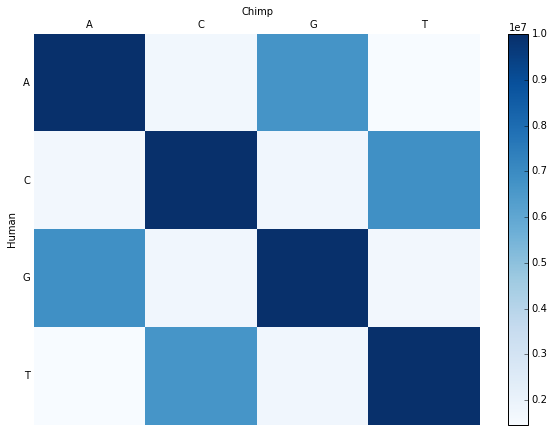

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from itertools import product

import datetime as dt
n1=dt.datetime.now()

bases=['A','C','G','T']
k = 2
        
count_table = pd.read_csv("/home/alisay/hexamer_mutation_data/hg38.panTro5.one_mers_transitions",index_col=0, header=0)
#print(count_table)

# fill the diagonal with very high values
np.fill_diagonal(count_table.values, 10000000)


plt.figure(1, figsize=(10, 7))
ax = plt.subplot(1, 1, 1)
heatmap = ax.pcolor(count_table, cmap=plt.cm.Blues)
plt.colorbar(heatmap)

# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(count_table.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(count_table.shape[1]) + 0.5, minor=False)

#make display more natural
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# set labels
ax.set_xticklabels(count_table.columns, minor=False)
ax.set_yticklabels(count_table.index, minor=False)

# rotate the x labels
#plt.xticks(rotation=90)

#ax.grid(True)
ax.grid(False)

# Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
    
plt.xlabel("Chimp")
plt.ylabel("Human")

plt.show()

# Version 3 Calculation:  just get the raw values of transitions from kmer to kmer

In [ ]:
import csv
from itertools import product

import datetime as dt
n1=dt.datetime.now()

bases=['A','C','G','T']
k = 2
kmer_dict = dict()
kmer_freq = dict()
kmer_list = [''.join(p) for p in product(bases, repeat=k)]
for i in kmer_list:
    kmer_dict[i] = dict()
    kmer_freq[i] = 0 # keeps track of the frequency of a particular k-mer
    for j in kmer_list:
        kmer_dict[i][j] = 0.0

file = open('/home/alisay/hexamer_mutation_data/hg38.panTro5.net.axt', "r+")
out_file_transitions = open('/home/alisay/hexamer_mutation_data/hg38.panTro5.two_mers_transitions', "w")
out_file_frequency = open('/home/alisay/hexamer_mutation_data/hg38.panTro5.two_mers_frequency', "w")
thedatawriter_transitions = csv.writer(out_file_transitions)
thedatawriter_frequency = csv.writer(out_file_frequency)

counter = 1
while True:
    line = file.readline()
    if not line: break
    if line.startswith("#") or line.startswith("\n"):
        continue
    counter += 1
    human = file.readline().strip().upper()
    if not human: break
    chimp = file.readline().strip().upper()
    for idx in range(0,len(human)-k):
        h_kmer = human[idx:(idx+k)]
        c_kmer = chimp[idx:(idx+k)]
        if (h_kmer in kmer_dict):
            if (c_kmer in kmer_dict[h_kmer]):
                kmer_freq[h_kmer] += 1 # update the frequency in the human genome
                kmer_dict[h_kmer][c_kmer] += 1 
    #if(counter%1000==0):
     #   print(counter)
        
#output
thedatawriter_transitions.writerow(["kmer"] + kmer_list)
thedatawriter_frequency.writerow(["kmer","frequency"])
for i in kmer_list:
    row = [i]
    frequency_row = [i]
    frequency_row.append(kmer_freq[i])
    thedatawriter_frequency.writerow(frequency_row)
    for j in kmer_list:
        row.append(kmer_dict[i][j]*1.0)
    thedatawriter_transitions.writerow(row)
out_file_transitions.close()  
out_file_frequency.close()

n2=dt.datetime.now()
print((n2-n1).seconds)

3506


# Second Version Visualization
## Explanation of the patterns for un-normalized two-mer transitions
##  Symmetry is explained by, well, symmetry:  the AA->AG dark square has a symmetric AA->GA dark square;  the darkest tansitions are purine->purine and pyramidine->pyramidine; 


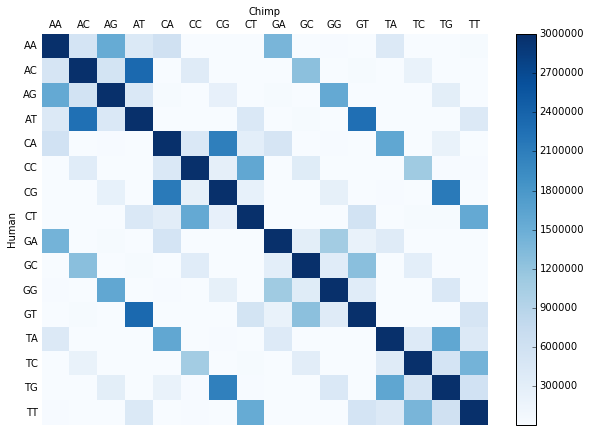

In [45]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from itertools import product

import datetime as dt
n1=dt.datetime.now()

bases=['A','C','G','T']
k = 2

        
count_table = pd.read_csv("/home/alisay/hexamer_mutation_data/hg38.panTro5.two_mers_full",index_col=0, header=0)
#print(count_table)

# fill the diagonal with very high values
np.fill_diagonal(count_table.values, 3000000)


plt.figure(1, figsize=(10, 7))
ax = plt.subplot(1, 1, 1)
heatmap = ax.pcolor(count_table, cmap=plt.cm.Blues)
plt.colorbar(heatmap)

# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(count_table.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(count_table.shape[1]) + 0.5, minor=False)

#make display more natural
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# set labels
ax.set_xticklabels(count_table.columns, minor=False)
ax.set_yticklabels(count_table.index, minor=False)

# rotate the x labels
#plt.xticks(rotation=90)

#ax.grid(True)
ax.grid(False)

# Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
    
plt.xlabel("Chimp")
plt.ylabel("Human")

plt.show()

# Second Version Code
## counts no-changes, and when there is more than 1 difference between 2 n-mers
## also, for each n-mer, normalize by the total n-mer count in the genome

In [30]:
import csv
from itertools import product

import datetime as dt
n1=dt.datetime.now()

bases=['A','C','G','T']
k = 2
kmer_dict = dict()
kmer_freq = dict()
kmer_list = [''.join(p) for p in product(bases, repeat=k)]
for i in kmer_list:
    kmer_dict[i] = dict()
    kmer_freq[i] = 0 # keeps track of the frequency of a particular k-mer
    for j in kmer_list:
        kmer_dict[i][j] = 0

file = open('/home/alisay/hexamer_mutation_data/hg38.panTro5.net.axt', "r+")
out_file = # open('/home/alisay/hexamer_mutation_data/hg38.panTro5.two_mers', "w")
thedatawriter = csv.writer(out_file)

counter = 1
while True:
    line = file.readline()
    if not line: break
    if line.startswith("#") or line.startswith("\n"):
        continue
    counter += 1
    human = file.readline().strip().upper()
    if not human: break
    chimp = file.readline().strip().upper()
    for idx in range(0,len(human)-k):
        h_kmer = human[idx:(idx+k)]
        c_kmer = chimp[idx:(idx+k)]
        if (h_kmer in kmer_dict):
            kmer_freq[h_kmer] += 1 # update the frequency in the human genome
            if (c_kmer in kmer_dict[h_kmer]):
                kmer_dict[h_kmer][c_kmer] += 1 
    #if(counter%1000==0):
     #   print(counter)
        
#output
thedatawriter.writerow(["kmer"] + kmer_list)
for i in kmer_list:
    row = [i]
    for j in kmer_list:
        row.append(kmer_dict[i][j]/kmer_freq[i]) #normalize by the total occurrence of the kmer in human
        #print(i, " ", j, " ", kmer_dict[i][j])
    thedatawriter.writerow(row)
out_file.close()  

n2=dt.datetime.now()
print((n2-n1).seconds)

3694


# First Version, does not count no-changes, or when there is more than 1 difference between 2 n-mers

In [17]:
import csv
from itertools import product

import datetime as dt
n1=dt.datetime.now()

bases=['A','C','G','T']
k = 6
kmer_dict = dict()
kmer_list = [''.join(p) for p in product(bases, repeat=k)]
for i in kmer_list:
    kmer_dict[i] = dict()
    for j in kmer_list:
        kmer_dict[i][j] = 0

file = open('/home/alisay/hexamer_mutation_data/hg38.panTro5.net.axt', "r+")
out_file = open('/home/alisay/hexamer_mutation_data/hg38.panTro5.six_mers', "w")
thedatawriter = csv.writer(out_file)

while True:
    line = file.readline()
    if not line: break
    if line.startswith("#") or line.startswith("\n"):
        continue
    human = file.readline().strip().upper()
    if not human: break
    chimp = file.readline().strip().upper()
    for idx in range(0,len(human)):
        if ((human[idx] != chimp[idx]) and (human[idx] != "-") and (chimp[idx] != "-")):
            #print(idx," ",human[idx]," ",chimp[idx],"\n")
            for start in range(max(0,idx-k+1),min(idx+1,len(human)-k+1)):
                h_kmer = human[start:(start+k)]
                c_kmer = chimp[start:(start+k)]
                if (("-" not in h_kmer) and ("-" not in c_kmer) and ("N" not in h_kmer) and ("N" not in c_kmer)
                   and (sum(ch1 != ch2 for ch1, ch2 in zip(h_kmer, c_kmer)) == 1)):
                    #if (h_kmer == "AA" and c_kmer == "TT"):
                    #print(line)
                    #print(idx)
                    #print(start)
                    kmer_dict[h_kmer][c_kmer] += 1 

#output
thedatawriter.writerow(["kmer"] + kmer_list)
for i in kmer_list:
    row = [i]
    for j in kmer_list:
        row.append(kmer_dict[i][j])
        #print(i, " ", j, " ", kmer_dict[i][j])
    thedatawriter.writerow(row)
out_file.close()  

n2=dt.datetime.now()
print((n2-n1).seconds)

1747
